<a href="https://colab.research.google.com/github/devikamsba2024/Machine_Learning/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes heatlh Predictor**

### **1.Objective:** To develop a predictive model for diabetes classification using the Diabetes Health Indicators Dataset. The goal is to accurately identify individuals as diabetic/pre-diabetic and healthy based on demographic, lifestyle, and health-related variables.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:

data = pd.read_csv("/content/diabetes_binary_health_indicators.csv")
data.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
5,0,0,0,1,18,0,0,0,1,1,...,0,0,2,7,0,0,0,1,4,7
6,0,0,1,1,26,1,0,0,1,1,...,1,0,1,0,0,0,1,13,5,6
7,0,0,0,1,31,1,0,0,0,1,...,1,0,4,0,0,0,1,6,4,3
8,0,0,0,1,32,0,0,0,1,1,...,1,0,3,0,0,0,0,3,6,8
9,0,0,0,1,27,1,0,0,0,1,...,1,0,3,0,6,0,1,6,4,4


# 2.Exploratory data analysis (EDA)

#### Here, We are Checking for Nulls, shape of the data and data type for columns

In [ ]:
# 1. Shape of the data
data_shape = data.shape

# 2. Check for null values
null_values = data.isnull().sum()

# 3. Check column data types
data_types = data.dtypes

data_shape, null_values[null_values > 0], data_types


((70692, 22),
 Series([], dtype: int64),
 Diabetes_binary         int64
 HighBP                  int64
 HighChol                int64
 CholCheck               int64
 BMI                     int64
 Smoker                  int64
 Stroke                  int64
 HeartDiseaseorAttack    int64
 PhysActivity            int64
 Fruits                  int64
 Veggies                 int64
 HvyAlcoholConsump       int64
 AnyHealthcare           int64
 NoDocbcCost             int64
 GenHlth                 int64
 MentHlth                int64
 PhysHlth                int64
 DiffWalk                int64
 Sex                     int64
 Age                     int64
 Education               int64
 Income                  int64
 dtype: object)

Trying to understand summary statistics for continuous variables and Distribution of target Variable

In [ ]:
# Target variable distribution
target_distribution = data['Diabetes_binary'].value_counts(normalize=True) * 100

# Summary statistics of selected continuous variables
summary_stats = data[['BMI', 'MentHlth', 'PhysHlth', 'Age']].describe()

target_distribution, summary_stats


(Diabetes_binary
 0    50.0
 1    50.0
 Name: proportion, dtype: float64,
                 BMI      MentHlth      PhysHlth           Age
 count  70692.000000  70692.000000  70692.000000  70692.000000
 mean      29.856985      3.752037      5.810417      8.584055
 std        7.113954      8.155627     10.062261      2.852153
 min       12.000000      0.000000      0.000000      1.000000
 25%       25.000000      0.000000      0.000000      7.000000
 50%       29.000000      0.000000      0.000000      9.000000
 75%       33.000000      2.000000      6.000000     11.000000
 max       98.000000     30.000000     30.000000     13.000000)

Result: Data is Balanced. There are no abnormalities found in the Summary statistics of continuous variables


We used histograms for BMI, MentHlth, and PhysHlth to see how the data is spread and to spot any outliers. Bar charts were used for HighBP, HighChol, and PhysActivity to compare how these features differ between people with and without diabetes. This helps us find patterns and understand which factors might be linked to diabetes.

In [ ]:


# Function to identify outliers using IQR
def identify_outliers(data_column):
    Q1 = np.percentile(data_column, 25)
    Q3 = np.percentile(data_column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data_column < lower_bound) | (data_column > upper_bound)


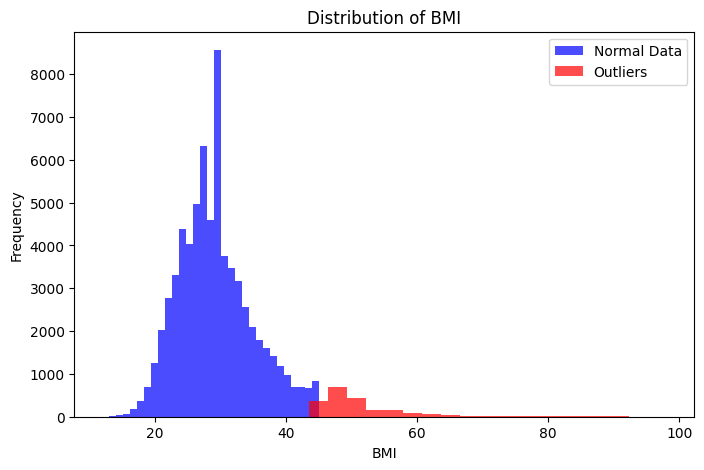

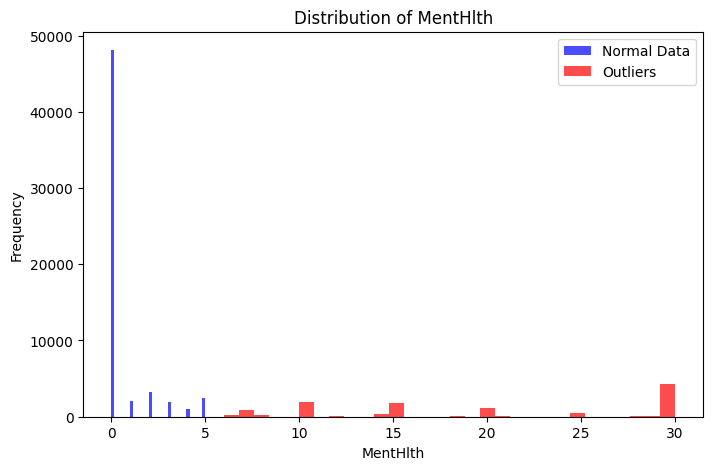

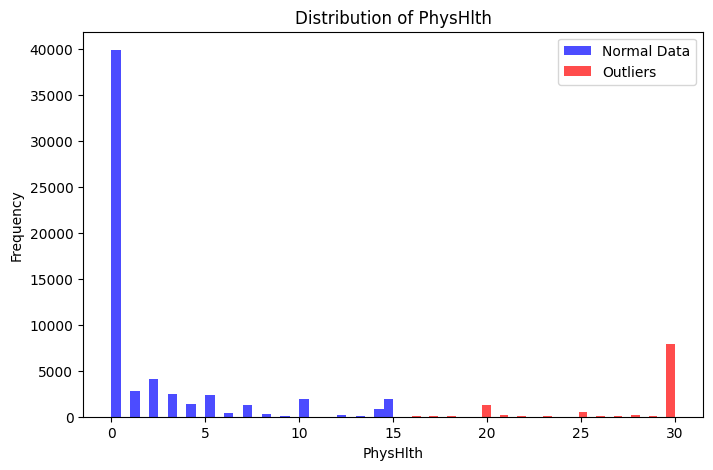

In [ ]:
 #Plot histograms for BMI, MentHlth, and PhysHlth with outliers in red
continuous_features = ['BMI', 'MentHlth', 'PhysHlth']
for feature in continuous_features:
    outliers = identify_outliers(data[feature])
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature][~outliers], bins=30, color='blue', alpha=0.7, label='Normal Data')
    plt.hist(data[feature][outliers], bins=30, color='red', alpha=0.7, label='Outliers')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Result: BMI above 40 are outliers and possibly data errors.

how the risk of diabetes increases with age?

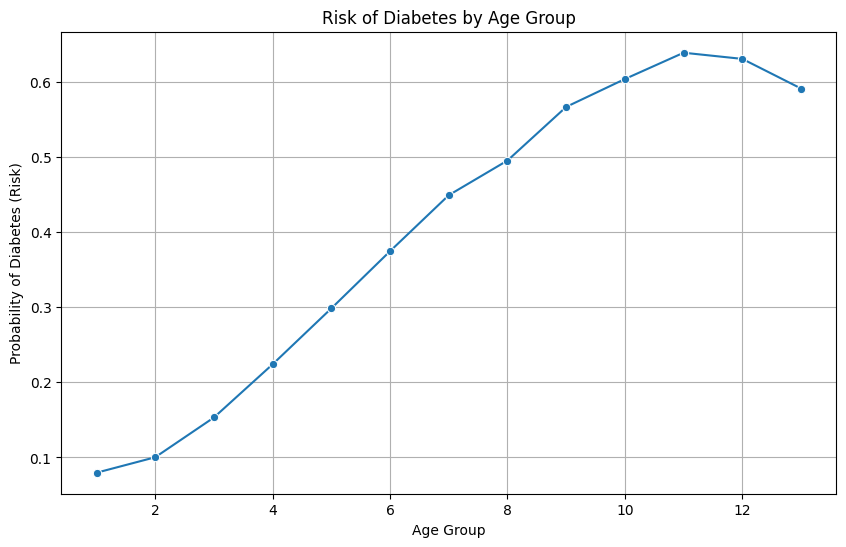

In [ ]:


# Calculate probabilities of diabetes for each age group
age_diabetes_risk = data.groupby('Age')['Diabetes_binary'].mean()

# Plot the risk of diabetes with age
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_diabetes_risk.index, y=age_diabetes_risk.values, marker='o')
plt.title('Risk of Diabetes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Probability of Diabetes (Risk)')
plt.grid(True)
plt.show()


Result: The figure illustrates with an increase in age, the risk of diabetes increases

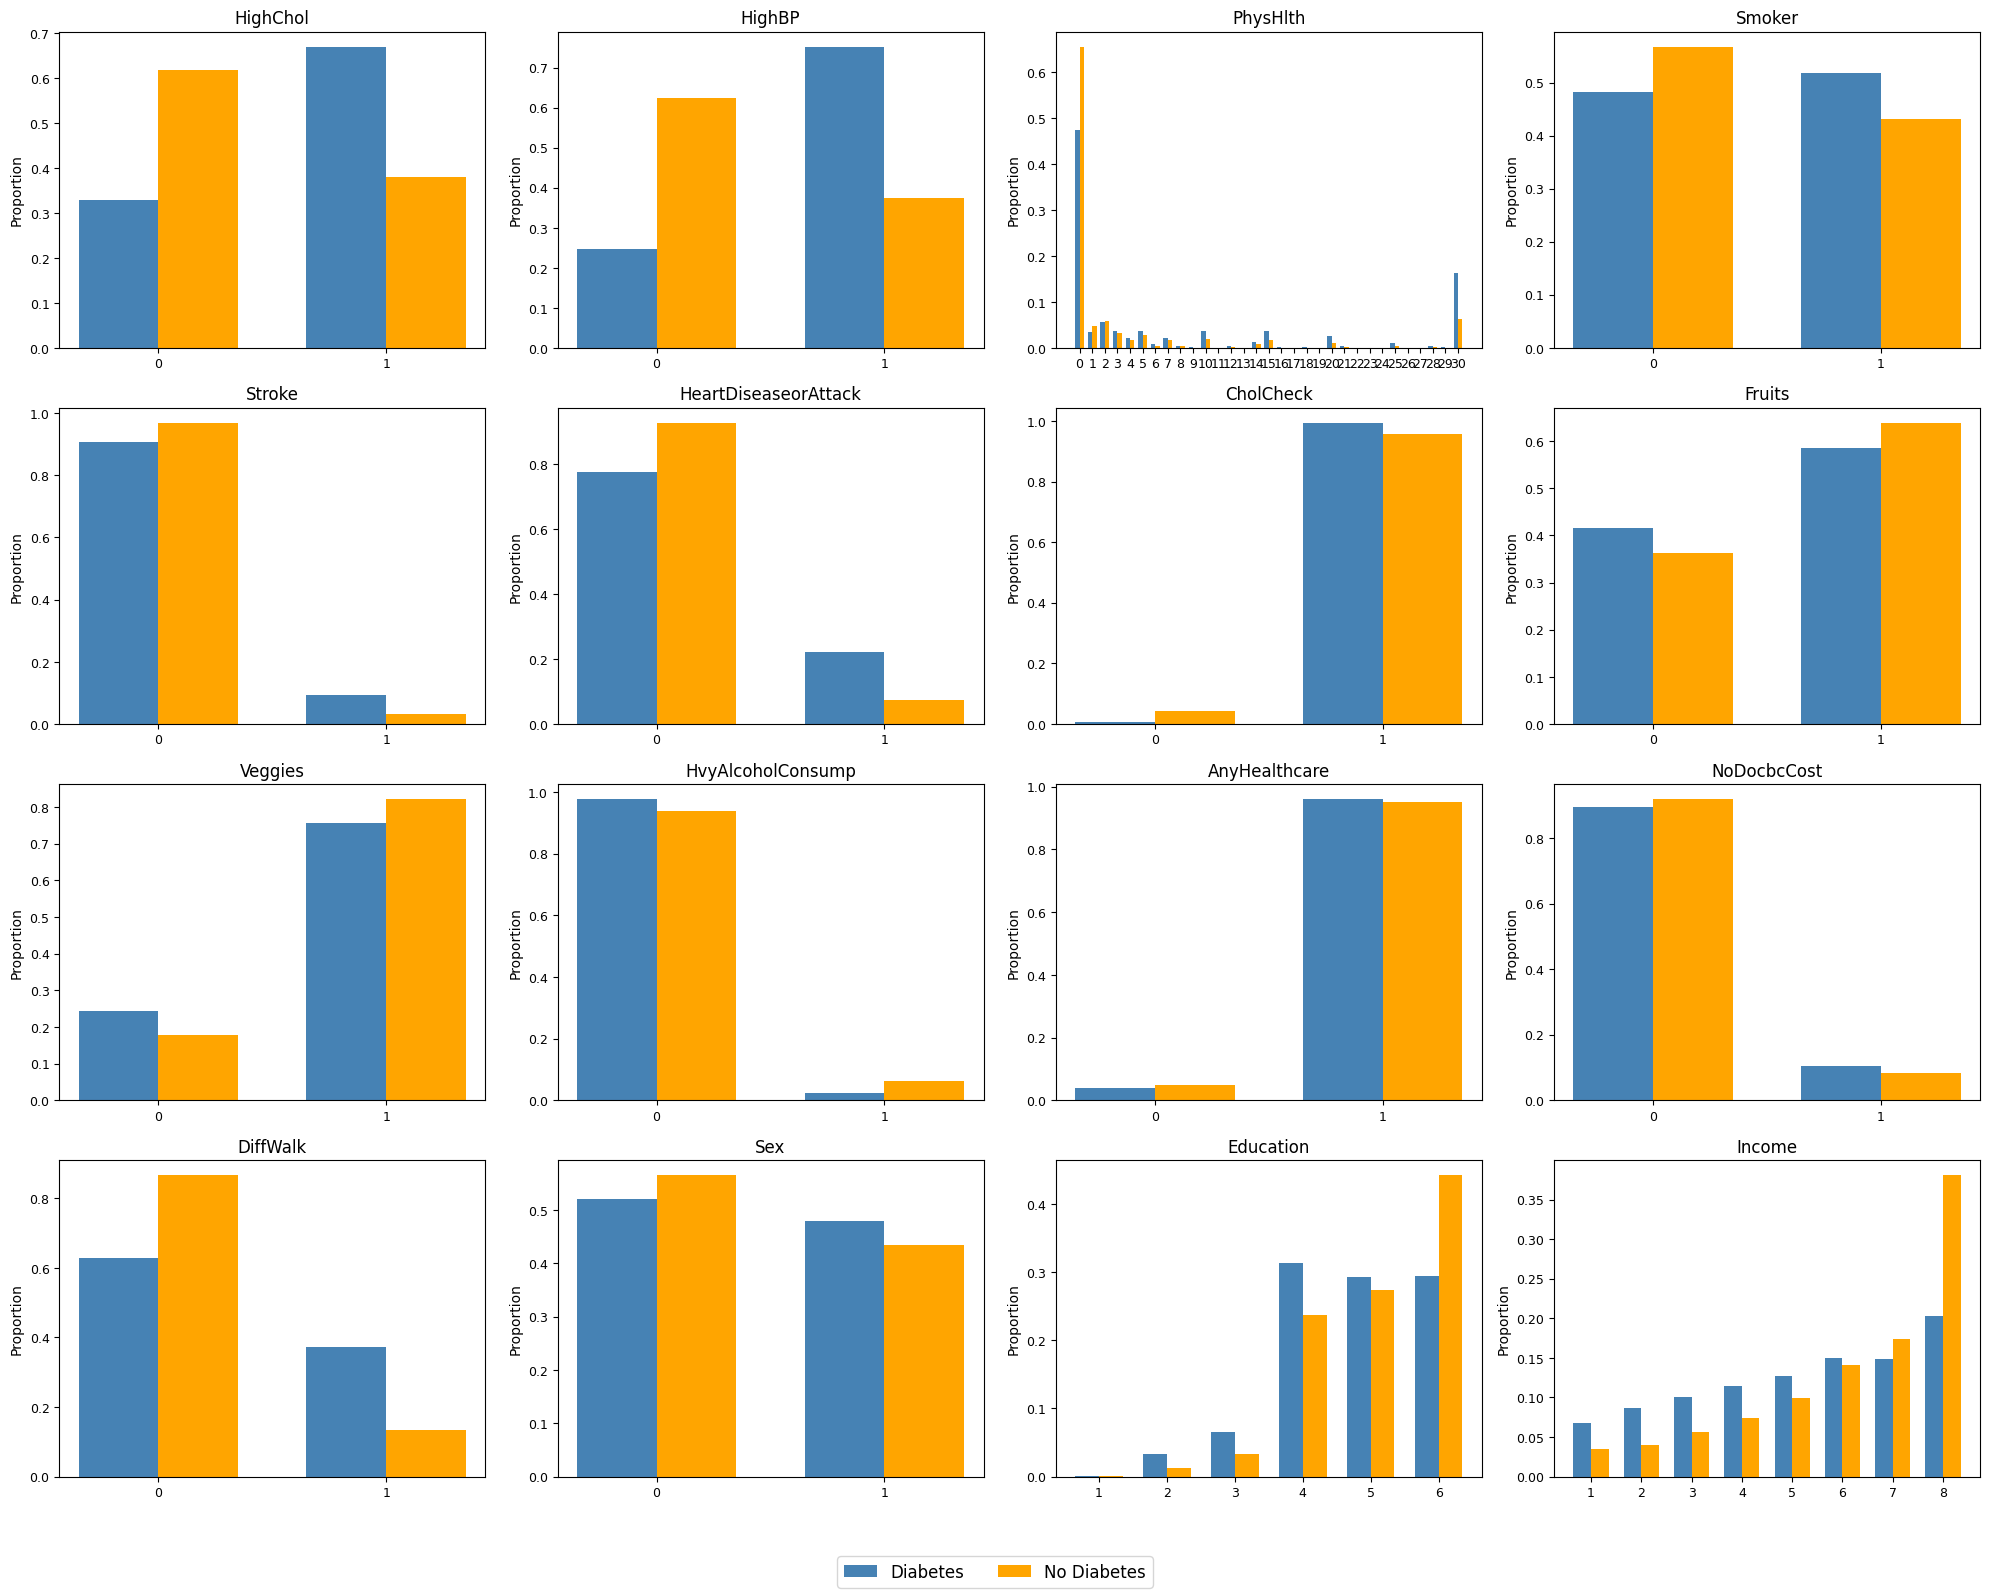

In [ ]:

# Identify remaining categorical variables not analyzed earlier
categorical_vars = ['HighChol', 'HighBP','PhysHlth', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'CholCheck', 'Fruits',
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'DiffWalk', 'Sex', 'Education', 'Income']

# Calculate the required number of rows and columns
num_vars = len(categorical_vars)
n_cols = 4  # Fixed number of columns
n_rows = (num_vars + n_cols - 1) // n_cols  # Calculate required rows dynamically

# Set up the figure with dynamic rows and 4 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
fig.subplots_adjust(wspace=0.3, hspace=0.5)  # Add space between rows and columns
axes = axes.flatten()  # Flatten axes to iterate easily
bar_width = 0.35  # Width of bars

# Loop through each categorical variable
for i, var in enumerate(categorical_vars):
    diabetes_counts = data[data['Diabetes_binary'] == 1][var].value_counts(normalize=True).sort_index()
    no_diabetes_counts = data[data['Diabetes_binary'] == 0][var].value_counts(normalize=True).sort_index()

    # X positions
    index = np.arange(len(diabetes_counts.index))

    # Plot on the respective subplot
    ax = axes[i]
    ax.bar(index, diabetes_counts, bar_width, label='Diabetes', color='steelblue')
    ax.bar(index + bar_width, no_diabetes_counts, bar_width, label='No Diabetes', color='orange')

    ax.set_title(var, fontsize=12)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(diabetes_counts.index, fontsize=9)
    ax.set_ylabel('Proportion', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=9)

# Remove any extra subplots
for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

# Add a legend at the bottom
fig.legend(['Diabetes', 'No Diabetes'], loc='lower center', ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make space for legend
plt.show()


Result: Most People With High cholesterol,High BP,HeartDiseaseorAttack and difficulty in walking have diabetes

We are Trying to calculate correlation matrix and plot that on bar chart(independent variables on X-axis and dependent variables on Y-axis).This way we can compare the correlation of independent variables with the dependent variable side by side.

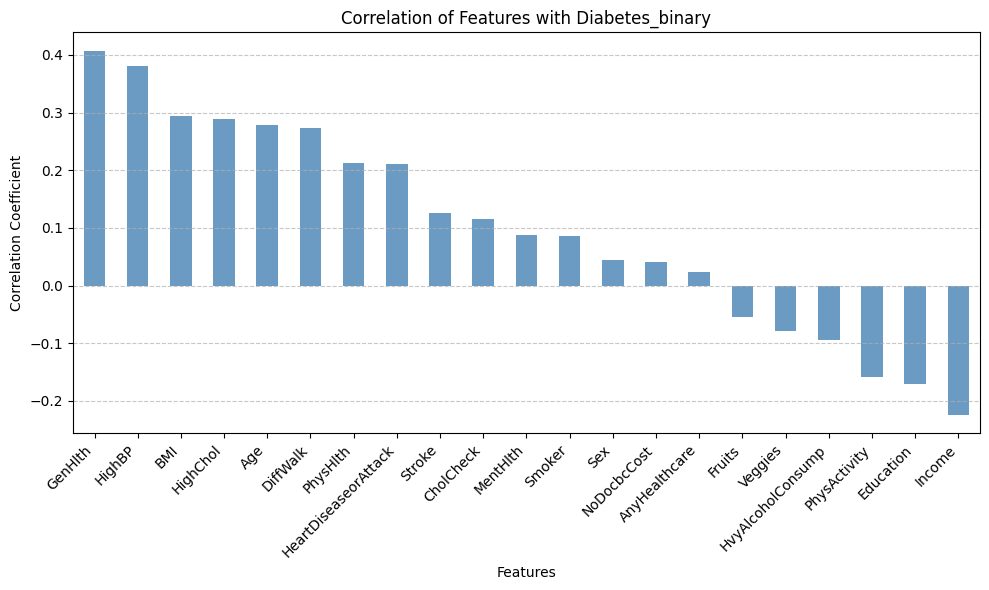

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Extract correlation values for the target variable 'Diabetes_binary'
correlation_with_target = correlation_matrix['Diabetes_binary'].drop('Diabetes_binary')

# Sort correlations in descending order
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Correlation of Features with Diabetes_binary')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


GenHlth,HighBP,BMI,HighChol,Age,DiffWalk Are the top 5 positively correlated features.Income,Education,PhysActivity are factors negatively correlating.

One key observation here is HvyAlcoholConsump is negatively correlating with Diabetes, which is intuitively incorrect but it doesnot mean that heavy alcohol consumption is protective against diabetes. In this dataset those who are classified as heavy drinkers are less likely to have diabetes.

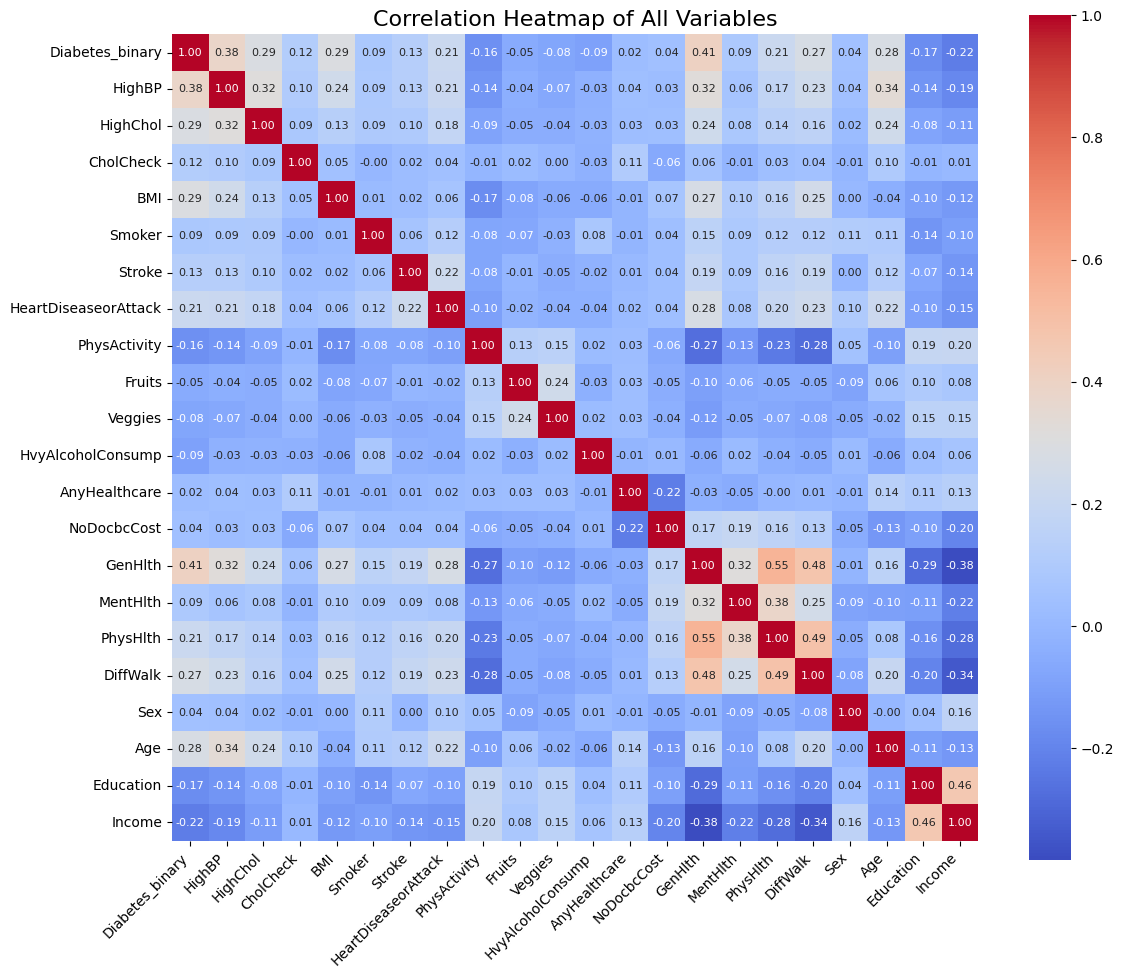

In [ ]:

# Generate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, annot_kws={"size": 8})
plt.title('Correlation Heatmap of All Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Result: considering the threshold for correlation coefficient > 0.8,There are no such variables that are in Multi colinearity.

# Model Building

##Logistic Regression

In [ ]:
# Separating features and target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the results
print("Precision for the base model",precision)

print("Recall for the base model" ,recall)

print(" F1 Score  for the base model" ,f1)



Precision for the base model 0.7374830852503383
Recall for the base model 0.7709354960392305
 F1 Score  for the base model 0.7538383512379547


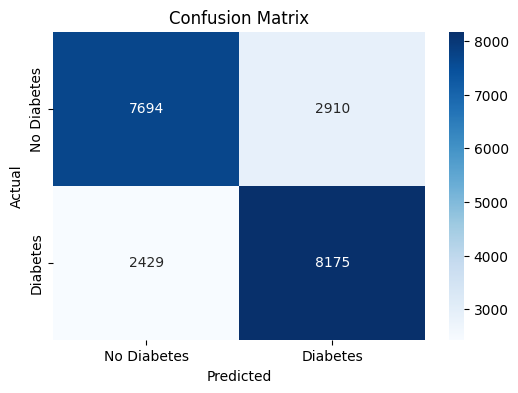

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


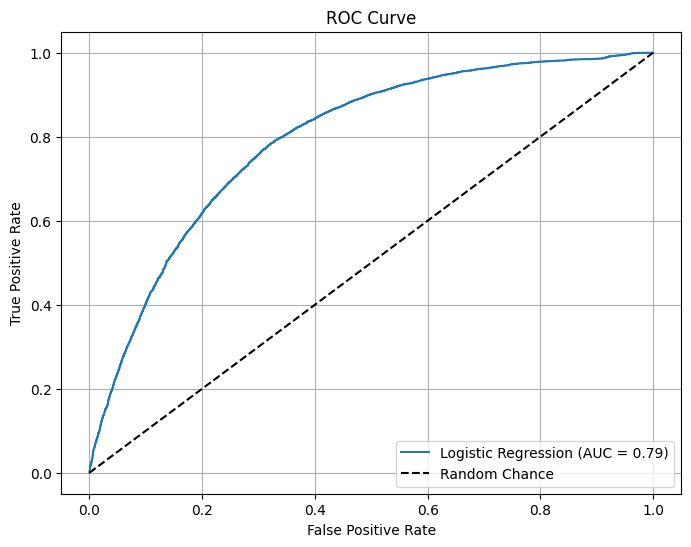

0.7940047009370357

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_prob = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

auc_score

This is our baseline model. Next, we will compare it with the advanced model  and compare their performance using the evaluation matrix

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=3, min_samples_split=5,random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the results
print("Precision for the Advanced model",precision_rf)

print("Recall for the base  Advanced" ,recall_rf)

print("F1 Score  for the Advanced model" ,f1_rf)

Precision for the Advanced model 0.7285418821096173
Recall for the base  Advanced 0.7972463221425877
F1 Score  for the Advanced model 0.7613472622478387


After Hyper parameter tuning this is the atmost performance that can be achieved for Random forest Model


In [ ]:
conf_matrix_rf

array([[7425, 3179],
       [2137, 8467]])

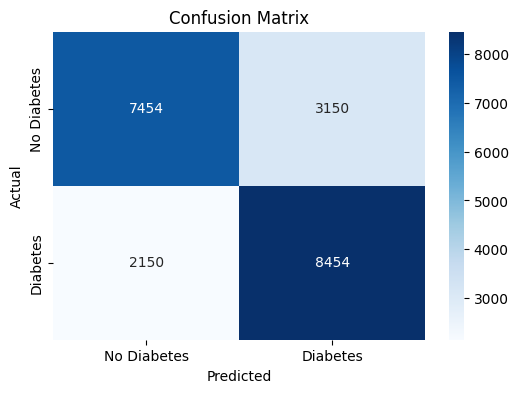

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest although performed relatively low compared to Logistic Regression.But Type 2 error rate is low for Random forest

## Neural Networks


In [ ]:

# Splitting features and target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Standardize the data for neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets (70% train, 30% test)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Build Neural Network model
nn_model = Sequential([
    Dense(64, activation='tanh', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='tanh'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])


# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_nn, y_train_nn, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

# Predict on the test set
y_pred_prob_nn = nn_model.predict(X_test).flatten()
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# Calculate evaluation metrics for the Neural Network
precision_nn = precision_score(y_test_nn, y_pred_nn)
recall_nn = recall_score(y_test_nn, y_pred_nn)
f1_nn = f1_score(y_test_nn, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test_nn, y_pred_nn)

# Display the results
print("Precision for the Neural Network",precision_nn)

print("Recall for the Neural Network" ,recall_nn)

print(" F1 Score  for the Neural Network" ,f1_nn)
print(conf_matrix_nn)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7190 - loss: 0.5505 - val_accuracy: 0.7474 - val_loss: 0.5100
Epoch 2/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7496 - loss: 0.5164 - val_accuracy: 0.7475 - val_loss: 0.5087
Epoch 3/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7471 - loss: 0.5169 - val_accuracy: 0.7470 - val_loss: 0.5088
Epoch 4/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7490 - loss: 0.5168 - val_accuracy: 0.7471 - val_loss: 0.5079
Epoch 5/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7495 - loss: 0.5136 - val_accuracy: 0.7495 - val_loss: 0.5062
Epoch 6/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7468 - loss: 0.5168 - val_accuracy: 0.7502 - val_loss: 0.5050
Epoch 7/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7509 - loss: 0.5086 - val_accuracy: 0.7509 - val_loss: 0.5047
Epoch 8/30
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7462 - loss: 0.5158 - val_accurac

Fine tuning is done by changing the hyper parameters like epochs,activation function. This is the atmost perfromance that can be achieved from Neural Networks

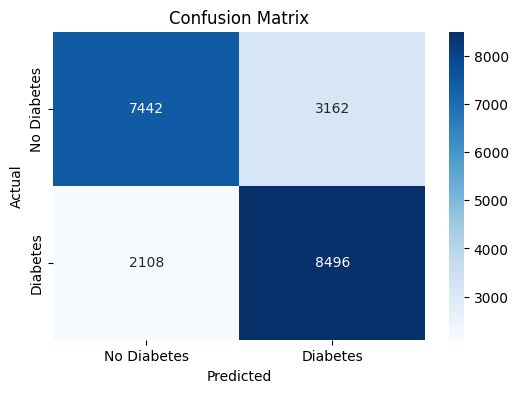

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


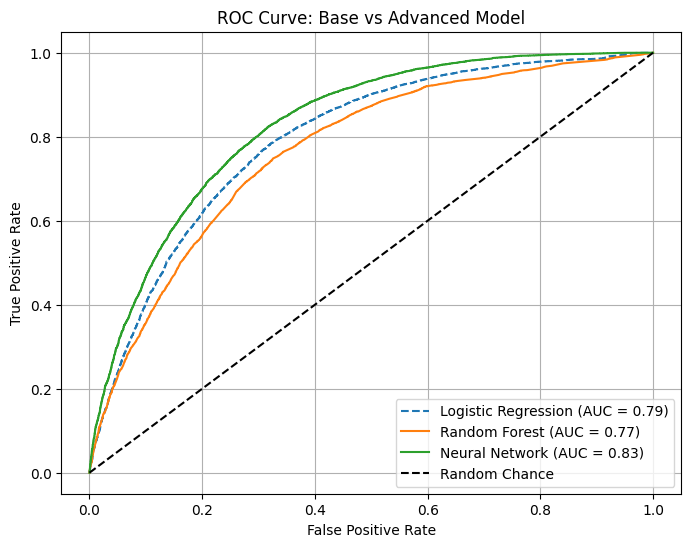

In [ ]:
# Predict probabilities for both models
y_prob_base = logistic_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_nn = nn_model.predict(X_test_nn).flatten()

# Compute ROC curves
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
fpr_advanced, tpr_advanced, _ = roc_curve(y_test, y_prob_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test_nn, y_prob_nn)

# Calculate AUCs
auc_base = roc_auc_score(y_test, y_prob_base)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_nn = roc_auc_score(y_test_nn, y_prob_nn)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f'Logistic Regression (AUC = {auc_base:.2f})', linestyle='--')
plt.plot(fpr_advanced, tpr_advanced, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Base vs Advanced Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame to compare evaluation metrics
comparison_data = {
    "Model": ["Logistic Regression", "Random Forest", "Neural Network"],
    "Precision": [precision,precision_rf,precision_nn],
    "Recall": [recall,recall_rf,recall_nn],
    "F1 Score": [f1,f1_rf,f1_nn],
    "AUC": [auc_base,auc_rf,auc_nn]
}

comparison_df = pd.DataFrame(comparison_data)

print(comparison_df)




                 Model  Precision    Recall  F1 Score       AUC
0  Logistic Regression   0.737483  0.770935  0.753838  0.794005
1        Random Forest   0.727007  0.798378  0.761023  0.768441
2       Neural Network   0.728770  0.801207  0.763274  0.828084



In terms of  Precision, Logistics regression performed well which means Less False Positive Rate.But In medical context Type 2 error is more significant.Type 2 error rate is less for Nueral networks.Moreover all the remaining metrics like Recall,F1 Score, AUC performed well for Neural Networks

###Key Learnings:

Logistic Regression outperformed Random Forest that could be because of linearity of the data. if data is linear logistic regression is also equally efficient. But Nueral Network being the superior model captured all the relations between fetures and outperformed logistic regression and Random forest.

###Insights from the Model
people with High Cholestral,High BP, high BMI have high chance of getting Diabetes.

The risk of diabetes is increasing with increasing Age.

People who have Physical Activity in their life will decrease the possibility of getting diabetes.


